In [190]:
## ANVÄNDS EJ LÄNGRE

## NLTK SET UP ##

## Natural language processing, pandas setup

#Import tokenization, download stopwords & punkt. Download not needed each run but left in for compatibility.
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import download 
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')


## Feed variable with NLTK stopwords
stop_words = set(stopwords.words("swedish"))




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bohmaniac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/bohmaniac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bohmaniac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [191]:

## SET UP PANDAS & READ FILE ##
import pandas as pd
# read the file called 2022.json that is in the same directory and call it jobtech_dataset
#jobtech_dataset = pd.read_csv('jobtech_dataset2022.csv')
jobtech_dataset = pd.read_csv('dfsvenska.csv')
#pd.set_option('max_colwidth', None) # Tell editor to not limit column width


df = jobtech_dataset[['id', 'description', 'occupation', 'occupation_field', 'timestamp']]  # Picking our columns



In [192]:
#Choosing data & tokenizes it

#min_variabel = df.iloc[0:100]['description']            # Taking the second row from the data and only 'description' column
min_variabel = df['description']
# Prints the entire description of a certain row for debug purposes
print(min_variabel)

# Tokenizes by word, each word becomes an entry in an array. Feed them into another variable. We need to fix our variable names.
variabel = word_tokenize(str(min_variabel))


0       {'text': 'Tänk dig de mest högteknologiska elektronikprodukterna du kan föreställa dig, och sen tänker du ett steg längre. Med världsledande produktionslösningar leder de elektronikindustrin och skapar dagens mest högteknologiska produkter, men med en ödmjukhet inför att det viktigaste för att lyckas med detta är en passion för såväl affärer som teknik och framförallt människor. Mycronic befinner sig i en expansiv fas där de vill fortsätta etablera sig på fler marknader och i fler länder och för att göra detta söker de personer som vill vara med på deras fortsatta resa. Välkommen till Mycronic!\n\nOM TJÄNSTEN\nMycronic är ett svenskt bolag som i över 40 år har utvecklat och tillverkat elektronik- och displaytillverkare och har idag kunder och distributörer i över 50 länder världen över. I dagsläget finns det inget annat företag i hela världen som kan konkurrera med Mycronics teknik och produkter. så är de tillverkade med Mycronics maskiner – och det är dessa som du kommer att v

In [193]:
## STOPWORDS & PUNCTUATION## + BLACKLIST



#For each word in our variable, remove those that are stopwords
filtrerad_lista = []
for word in variabel:
    if word.casefold() not in stop_words:
        filtrerad_lista.append(word)


# Ta bort punkter och sånt
blacklist = ["'", ".", ":", "!", "*", "None", ",", "(", ")", "?", "{", "kommer"]
ny_filtrerad_lista = []
for word in filtrerad_lista:
    if word not in blacklist:
        ny_filtrerad_lista.append(word)




#Prints our list of remaining, non-stop words

print(ny_filtrerad_lista)





['0', "'text", "'Tänk", 'mest', 'högteknologiska', 'elektronikprodukterna', 'föreställa', 'sen', 'tänker', 'steg', 'längre', 'världsledande', 'produktionslösningar', 'leder', 'elektronikindustrin', 'skapar', 'dagens', 'mest', 'högteknologiska', 'produkter', 'ödmjukhet', 'inför', 'viktigaste', 'lyckas', 'passion', 'såväl', 'affärer', 'teknik', 'framförallt', 'människor', 'Mycronic', 'befinner', 'expansiv', 'fas', 'vill', 'fortsätta', 'etablera', 'fler', 'marknader', 'fler', 'länder', 'göra', 'söker', 'personer', 'vill', 'fortsatta', 'resa', 'Välkommen', 'Mycronic', '\\n\\nOM', 'TJÄNSTEN\\nMycronic', 'svenskt', 'bolag', '40', 'år', 'utvecklat', 'tillverkat', 'elektronik-', 'displaytillverkare', 'idag', 'kunder', 'distributörer', '50', 'länder', 'världen', 'dagsläget', 'finns', 'inget', 'annat', 'företag', 'hela', 'världen', 'konkurrera', 'Mycronics', 'teknik', 'produkter', 'tillverkade', 'Mycronics', 'maskiner', '–', 'viktig', 'del', 'utvecklingen', 'projektledningen', 'av.\\nI', 'fortsa

In [194]:
##STEMMING 
##Reducerar ord som helper och helping till help
#Kommentar: Funkar inte görbra på svenska - precis som Vasili sa

#from nltk.stem import PorterStemmer
#from nltk.stem import LancasterStemmer


#stemmer = LancasterStemmer()

#stemmed_lista = [stemmer.stem(word) for word in ny_filtrerad_lista]

#print(stemmed_lista)

In [195]:
## Lemm (konverterar de stemmade orden till ord som betyder något)

#from nltk.stem import WordNetLemmatizer


#lemmatizer = WordNetLemmatizer()

#ny_lista = []
#for word in stemmed_lista: 
#    ny_lista.append(lemmatizer.lemmatize(word))

#print(ny_lista)




In [196]:
# Magin
#nltk.download("book")
from nltk import FreqDist

frequency_distribution = FreqDist(ny_filtrerad_lista)

print(frequency_distribution)
ny_variabel = frequency_distribution.most_common(50)

print(ny_variabel)

ny_variabel = frequency_distribution.most_common(20)
print("\nTop 50 most common words:")
for word, freq in ny_variabel:
    print(f"{word}: {freq}")





<FreqDist with 1343 samples and 2419 outcomes>
[('nya', 17), ('tjänsten', 16), ('samt', 15), ('Academic', 14), ('genom', 12), ('arbeta', 11), ('goda', 11), ('ta', 11), ('person', 11), ("'text", 10), ('vill', 10), ('arbete', 10), ('arbetar', 10), ('erfarenhet', 10), ("'text_formatted", 10), ("'company_information", 10), ("'needs", 10), ("'requirements", 10), ("'conditions", 10), ('}', 10), ('–', 9), ('får', 9), ('söker', 8), ('idag', 8), ('team', 8), ('tillsammans', 8), ('roll', 8), ('jobba', 8), ('kunskaper', 8), ('hanteras', 8), ('Work', 8), ('löpande', 8), ('god', 8), ('göra', 7), ('\\n\\n\\n', 7), ('svenska', 7), ('önskemål', 7), ('går', 7), ('ansökan', 7), ('även', 7), ('kund', 7), ('AB', 7), ('ansvar', 7), ('produkter', 6), ('kunder', 6), ('behöver', 6), ('projektledare', 6), ('projekten', 6), ('tror', 6), ('frågor', 6)]

Top 50 most common words:
nya: 17
tjänsten: 16
samt: 15
Academic: 14
genom: 12
arbeta: 11
goda: 11
ta: 11
person: 11
'text: 10
vill: 10
arbete: 10
arbetar: 10
er

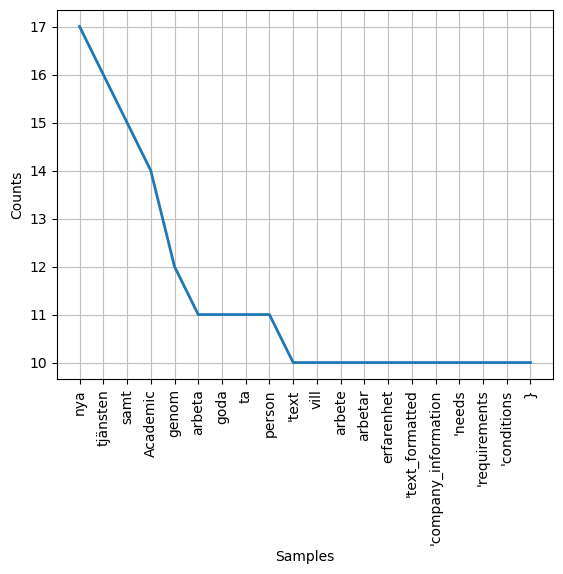

<Axes: xlabel='Samples', ylabel='Counts'>

In [197]:
## PLOT

frequency_distribution.plot(20, cumulative=False)